### BoomBikes_ Final - Assignment 

#### import libraries

In [1517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [1518]:
#read the data
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Quality Checks

In [1519]:
# shape of the data (number of rows and columns)
day.shape

(730, 16)

In [1520]:
# describing the data 
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1521]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1522]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- No Null Values

In [1523]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Insights: - We have 730 rows and 16 columns - No Null VAlues

#### Handling the Categorical Variables

In [1524]:
# Modifying the categorical variable in season 
day["season"] = day["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1525]:
# Modifying the categorical variable in mnth
day["mnth"] = day["mnth"].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1526]:
# Modifying the categorical variable in weekday 
day["weekday"] = day["weekday"].map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 
                                       5:'friday', 6:'saturday'})
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1527]:
# Modifying the categorical variable in weathersit 
day["weathersit"] = day["weathersit"].map({1:'Clear', 2:'Mist', 
                                           3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1528]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


#### Derving New metrics/changing Dtype in proper format

In [1529]:
# conveting date and time into datetime format from object
day['dteday'] = day['dteday'].astype('datetime64')
day.dteday

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [1530]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Data Visualization

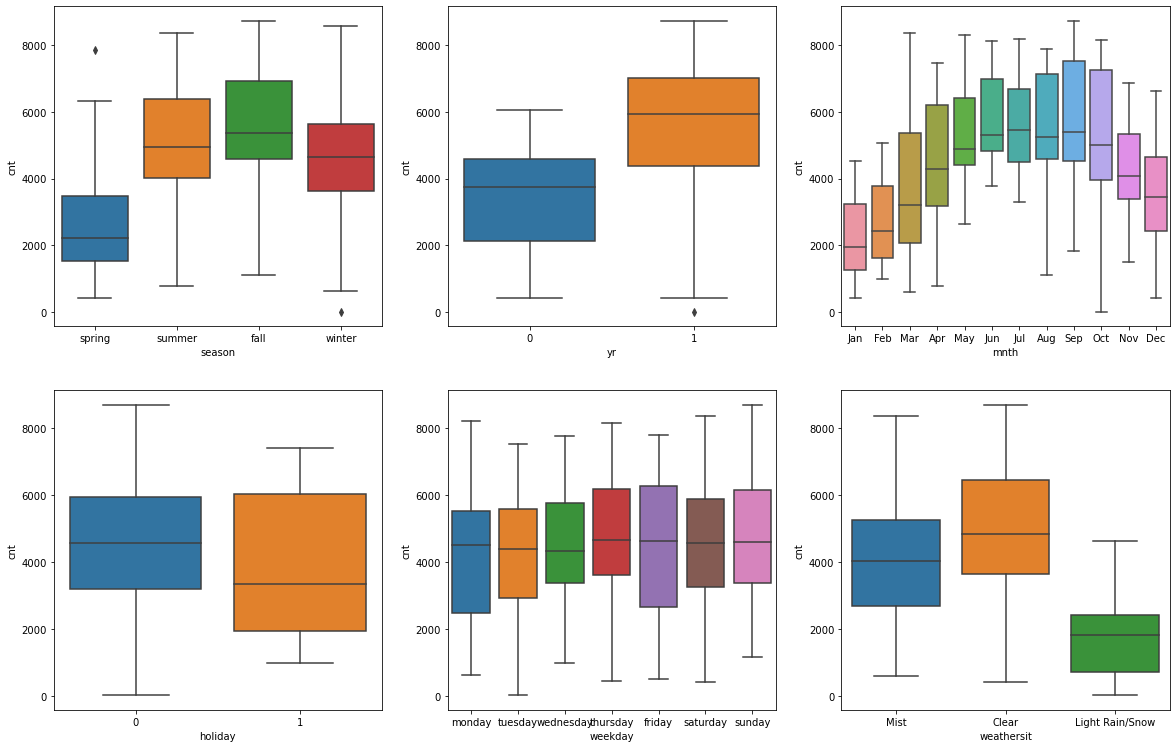

In [1531]:
#visualizing categorical variables
#box plot
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt',data=day)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data=day)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt',data=day)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt',data=day)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt',data=day)

plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt',data=day)

plt.show();

Insights:

- In the cnt vs season boxplot there is a hike in demand in summer and fall season.
- In 2019 there is a hike in demand of bikes.
- In cnt vs mnth, boxplot increase in demand from month of may which is supposed to be a holidays for childrens and teenagers.
- In holiday vs cnt, demand is more on working day
- Inconsistency on weekdays, consistency on weekends.
- In cnt vs weathersit situation boxplot we can clearly see a drop in demand in the snow weather.

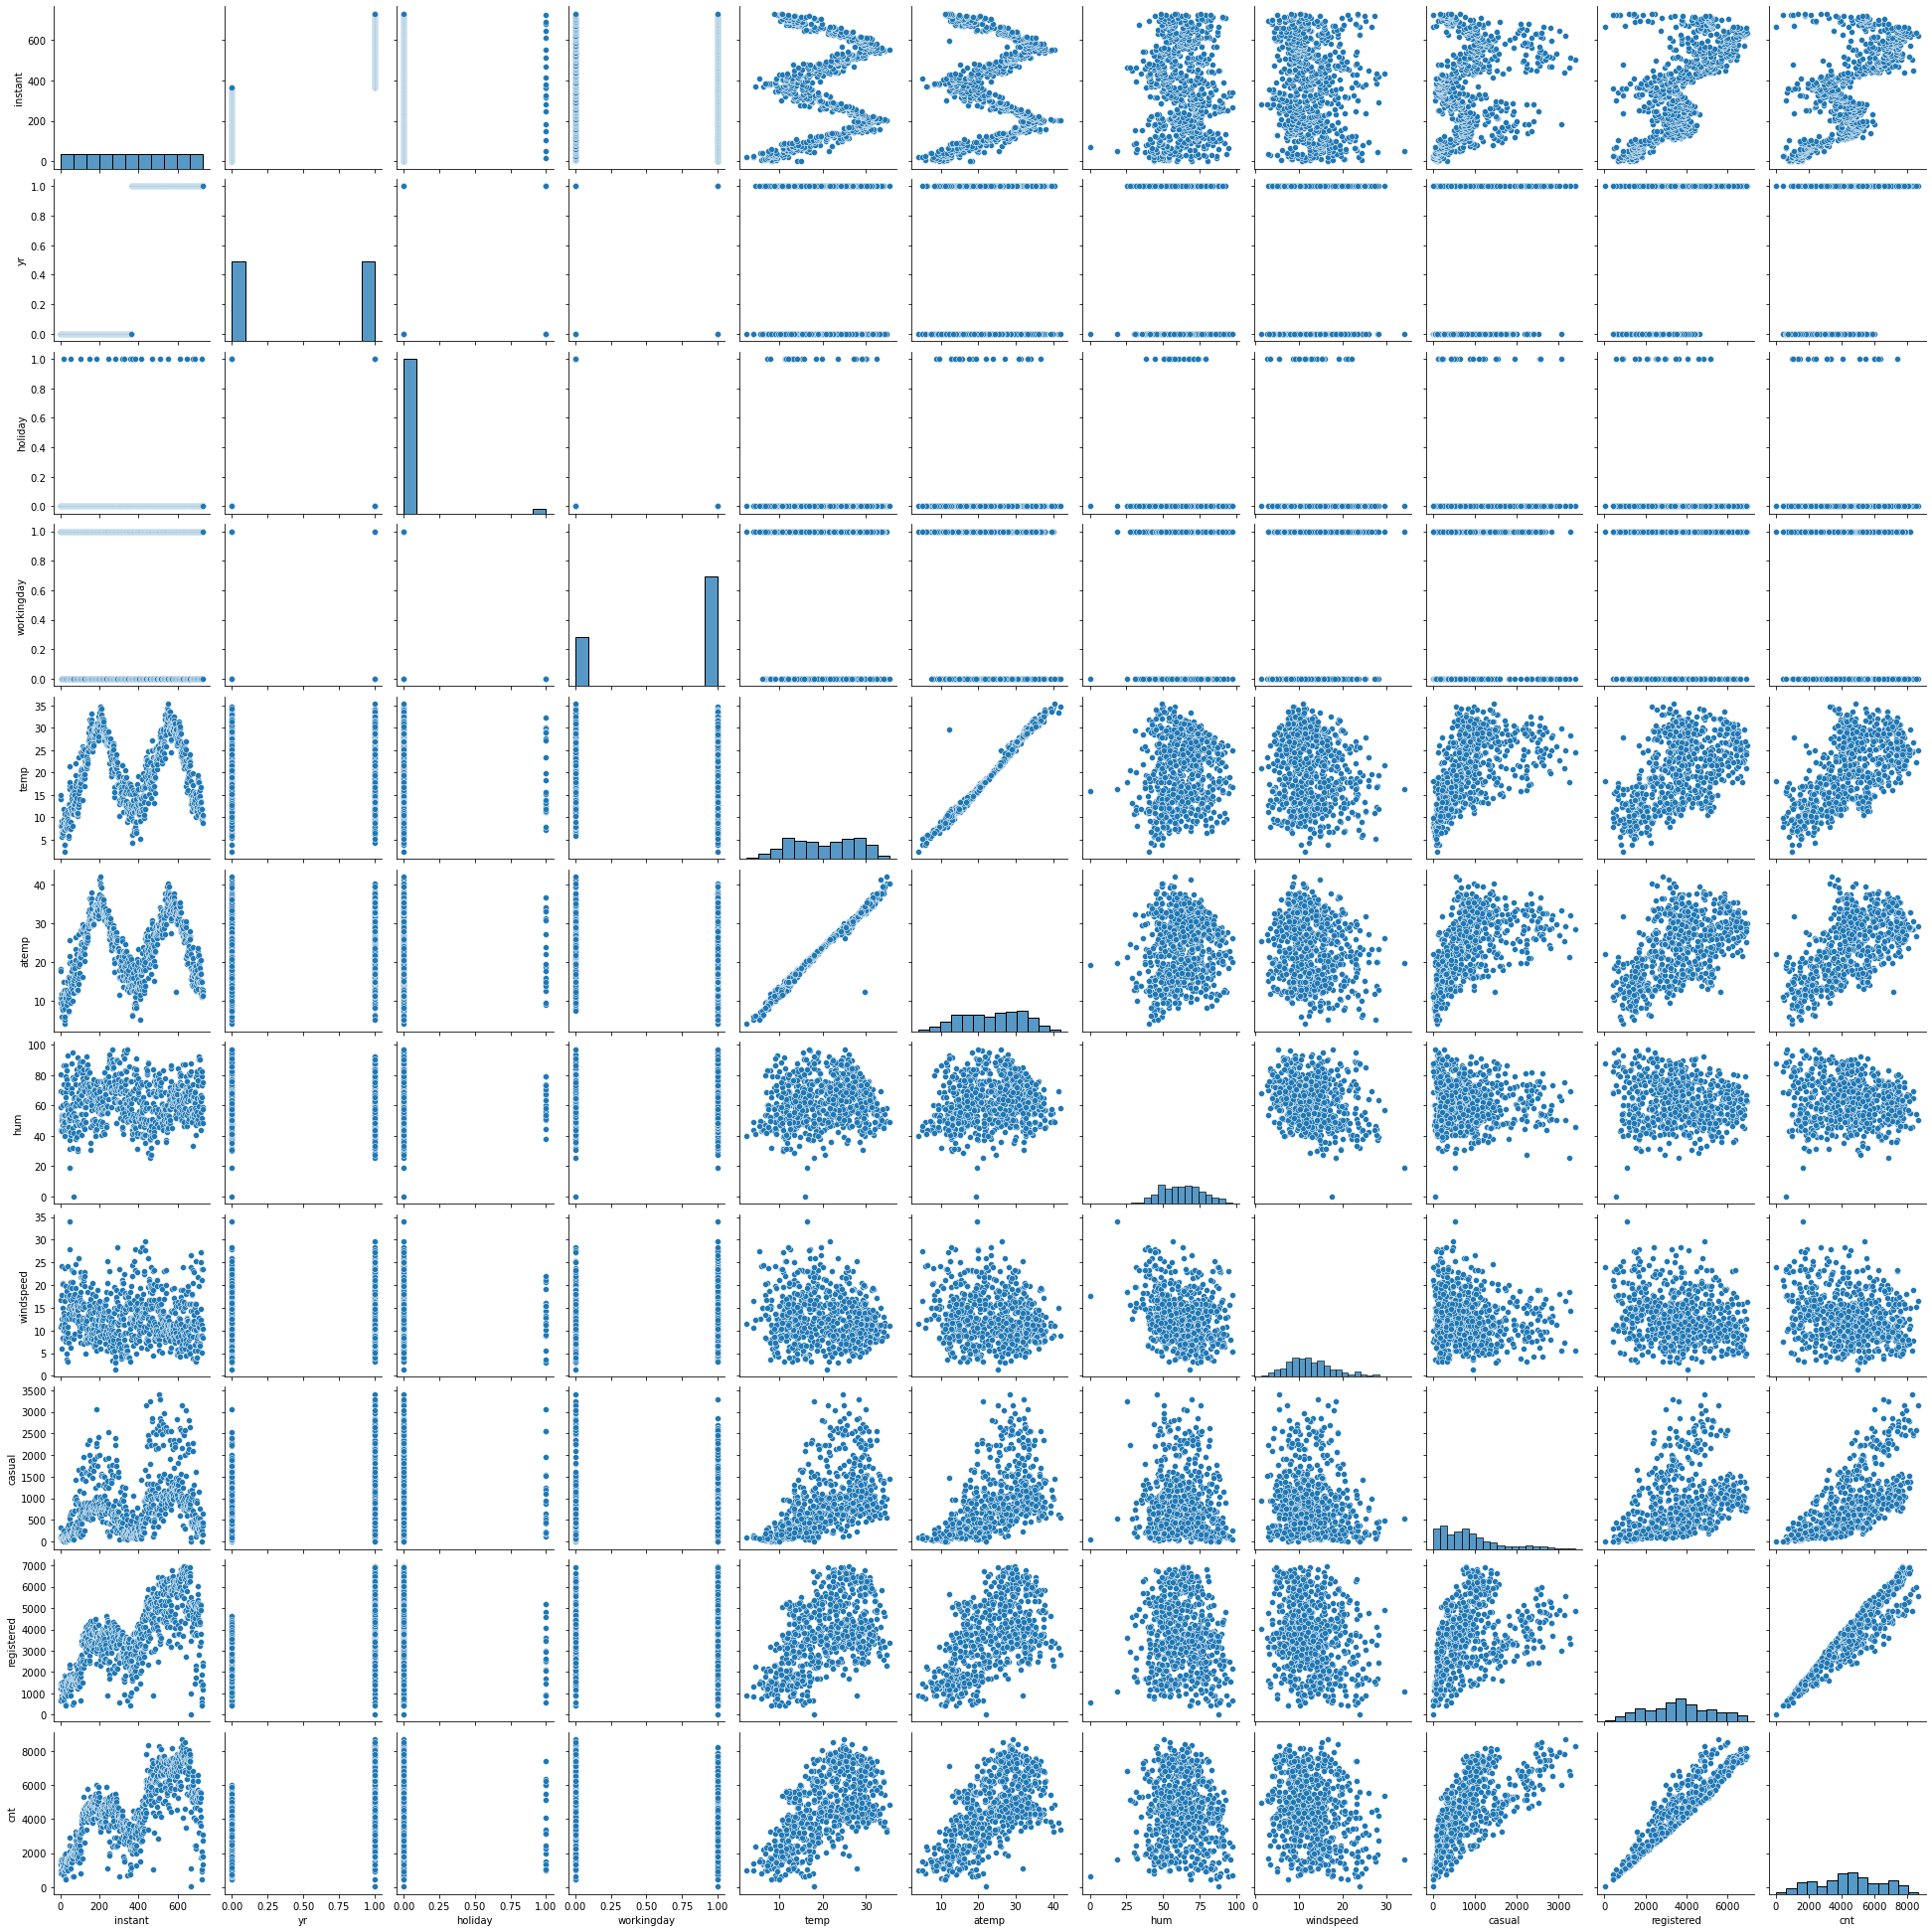

In [1532]:
sns.pairplot(day)
plt.show()

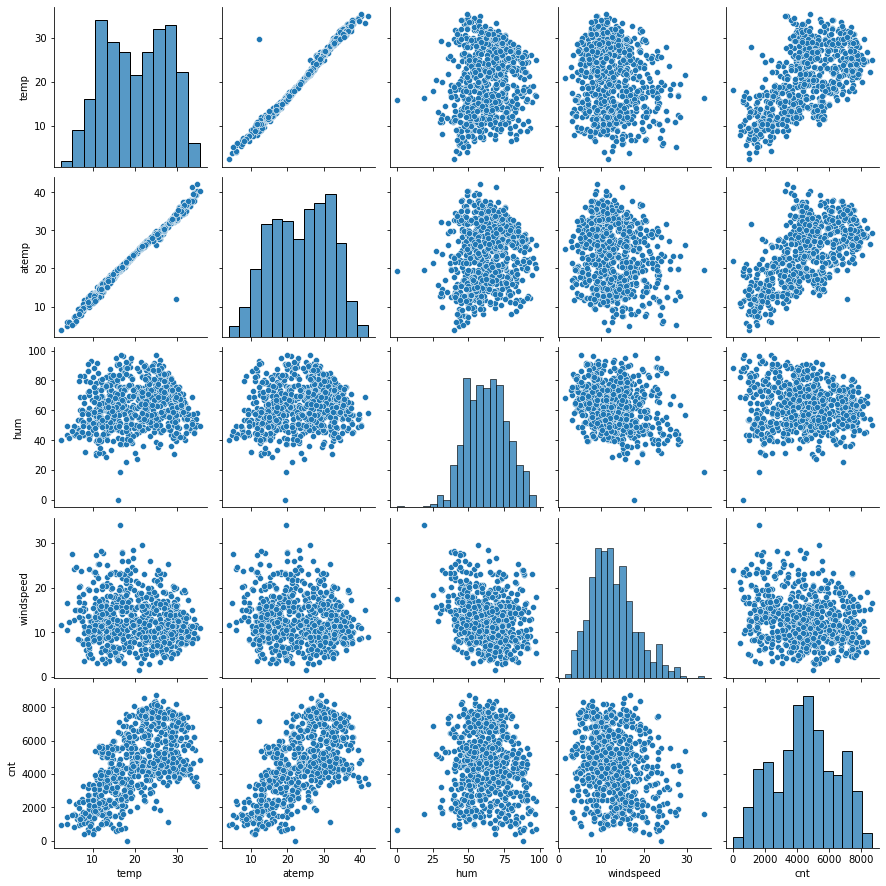

In [1533]:
#Pairplot
sns.pairplot(day, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [1534]:
#correlation
vars=['temp','atemp','hum','windspeed','cnt']
day_corr = day[vars].corr()
day_corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


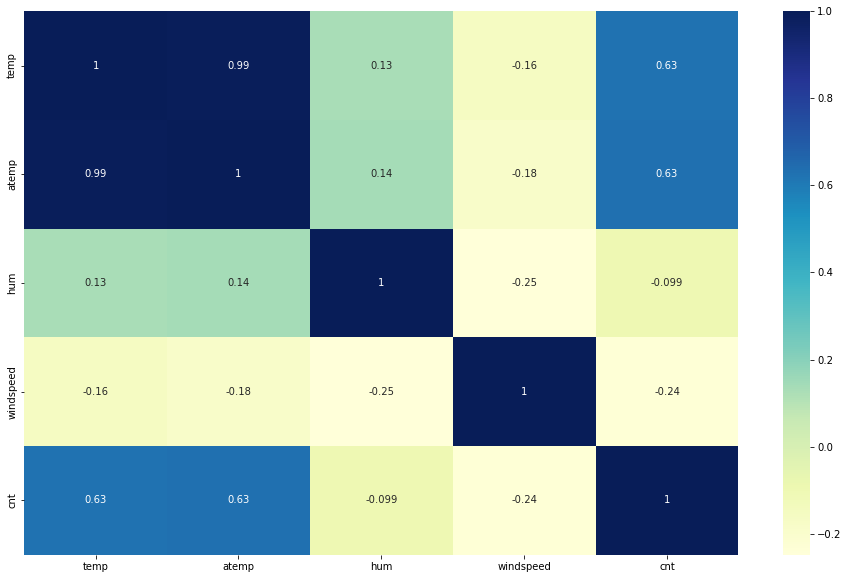

In [1535]:
# Heatmap of correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(day_corr, annot=True, cmap="YlGnBu")
plt.show()

Insights:
    - we see that atemp and temp is having correlation.

### Preparing the Data for Modeling

#### Dropping columns

In [1536]:
#dropping atemp column
day.drop('atemp',axis=1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 85.7+ 

In [1537]:
#Dropping registered column
day.drop('registered',axis=1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 80.0+ KB


In [1538]:
#dropping casual column
day.drop('casual',axis=1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 74.3+ KB


In [1539]:
#dropping dteday column
day.drop('dteday',axis=1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [1540]:
day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,spring,0,Jan,0,monday,1,Mist,14.110847,80.5833,10.749882,985
1,2,spring,0,Jan,0,tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,3,spring,0,Jan,0,wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,4,spring,0,Jan,0,thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,5,spring,0,Jan,0,friday,1,Clear,9.305237,43.6957,12.522300,1600


In [1541]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [1542]:
day.shape

(730, 12)

### Dummy variables creation

In [1543]:
# Creating dummy variables for categorical columns
categorical_cols = ["season", "mnth", "weekday", "weathersit"]
dummy_df = pd.get_dummies(day[categorical_cols], drop_first=True)
dummy_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1544]:
# Concating the dummy data with original data set
day = pd.concat([day, dummy_df], axis=1)
day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist
0,1,spring,0,Jan,0,monday,1,Mist,14.110847,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,2,spring,0,Jan,0,tuesday,1,Mist,14.902598,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,3,spring,0,Jan,0,wednesday,1,Clear,8.050924,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,4,spring,0,Jan,0,thursday,1,Clear,8.200000,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,5,spring,0,Jan,0,friday,1,Clear,9.305237,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [1545]:
day.shape

(730, 34)

In [1546]:
day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist
0,1,spring,0,Jan,0,monday,1,Mist,14.110847,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,2,spring,0,Jan,0,tuesday,1,Mist,14.902598,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,3,spring,0,Jan,0,wednesday,1,Clear,8.050924,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,4,spring,0,Jan,0,thursday,1,Clear,8.200000,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,5,spring,0,Jan,0,friday,1,Clear,9.305237,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [1547]:
day.drop(categorical_cols,axis=1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   instant                     730 non-null    int64  
 1   yr                          730 non-null    int64  
 2   holiday                     730 non-null    int64  
 3   workingday                  730 non-null    int64  
 4   temp                        730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

In [1548]:
day.shape

(730, 30)

In [1549]:
day.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Data splitting into train set and test set

In [1550]:
day_train , day_test = train_test_split(day, train_size=0.7, random_state=100)

In [1551]:
print(day_train.shape)
print(day_test.shape)

(510, 30)
(220, 30)


In [1552]:
#Rescalling
scaler= MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt','instant']
day_train[num_vars]=scaler.fit_transform(day_train[num_vars])
day_train.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist
576,0.791209,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0.585165,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1.000000,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0.662088,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0.152473,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


### Dividing X and Y for model building

In [1553]:
y_train= day_train.pop('cnt')
X_train=day_train

In [1554]:
X_train.isnull().sum()

instant                       0
yr                            0
holiday                       0
workingday                    0
temp                          0
hum                           0
windspeed                     0
season_spring                 0
season_summer                 0
season_winter                 0
mnth_Aug                      0
mnth_Dec                      0
mnth_Feb                      0
mnth_Jan                      0
mnth_Jul                      0
mnth_Jun                      0
mnth_Mar                      0
mnth_May                      0
mnth_Nov                      0
mnth_Oct                      0
mnth_Sep                      0
weekday_monday                0
weekday_saturday              0
weekday_sunday                0
weekday_thursday              0
weekday_tuesday               0
weekday_wednesday             0
weathersit_Light Rain/Snow    0
weathersit_Mist               0
dtype: int64

- No Null Values

In [1555]:
X_train.shape

(510, 29)

### Building our model

In [1556]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1557]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 12),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 13),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_monday', False, 9),
 ('weekday_saturday', False, 3),
 ('weekday_sunday', False, 4),
 ('weekday_thursday', False, 14),
 ('weekday_tuesday', False, 8),
 ('weekday_wednesday', False, 10),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [1558]:
col = X_train.columns[rfe.support_]
col

Index(['instant', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Light Rain/Snow', 'weathersit_Mist'],
      dtype='object')

In [1559]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_Dec', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [1560]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model Building

In [1561]:
# Adding a constant variable   
X_train_rfe = sm.add_constant(X_train_rfe)

In [1562]:
# Running the linear model
lr_model = sm.OLS(y_train,X_train_rfe).fit() 

In [1563]:
#Let's see the summary of our linear model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.57e-189
Time:                        18:41:22   Log-Likelihood:                 514.13
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2876      0.033      8.733      0.000       0.223       0.352
instant                       -0.0750      0.064     -1.168      0.244      -0.201       0.051
yr                             0.2675      0.033      8.143      0.000       0.203       0.332
holiday                       -0.0897      0.025     -3.518      0.000      -0.140      -0.040
temp                           0.4920      0.028     17.658      0.000       0.437       0.547
hum                           -0.1698      0.038     -4.525      0.000      -0.243      -0.096
windspeed                     -0.1935      0.026     -7.541      0.000      -0.244      -0.143
season_summer                  0.0875      0.013      6.684      0.000       0.062       0.113
season_winter                  0.1296      0.019      6.807      0.000       0.092       0.167
mnth_Aug                       0.0586      0.017      3.500      0.001       0.026       0.092
mnth_Feb                      -0.0392      0.023     -1.711      0.088      -0.084       0.006
mnth_Jan                      -0.0671      0.024     -2.785      0.006      -0.114      -0.020
mnth_Oct                       0.0373      0.018      2.104      0.036       0.002       0.072
mnth_Sep                       0.1272      0.017      7.592      0.000       0.094       0.160
weathersit_Light Rain/Snow    -0.2443      0.026     -9.291      0.000      -0.296      -0.193
weathersit_Mist               -0.0541      0.010     -5.187      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       67.981   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.260
Skew:                          -0.713   Prob(JB):                     1.93e-34
Kurtosis:                       5.296   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1564]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.74
1,instant,21.61
2,yr,17.09
8,season_winter,4.27
11,mnth_Jan,2.96
4,temp,2.50
10,mnth_Feb,2.07
7,season_summer,2.02
5,hum,1.89
15,weathersit_Mist,1.56


In [1565]:
# dropping the varible instant, because it of highest VIF & pvalue
X_train_new = X_train_rfe.drop(["instant"], axis = 1)

In [1566]:
# rebuilding the model without const.
X_train_lm = sm.add_constant(X_train_new)

In [1567]:
lr_model = sm.OLS(y_train,X_train_lm).fit()

In [1568]:
#Let's see the summary of our linear model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.20e-189
Time:                        18:41:22   Log-Likelihood:                 513.43
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     495   BIC:                            -933.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2721      0.030      9.027      0.000       0.213       0.331
yr                             0.2303      0.008     28.508      0.000       0.214       0.246
holiday                       -0.0915      0.025     -3.593      0.000      -0.141      -0.041
temp                           0.4899      0.028     17.612      0.000       0.435       0.545
hum                           -0.1741      0.037     -4.662      0.000      -0.247      -0.101
windspeed                     -0.1922      0.026     -7.495      0.000      -0.243      -0.142
season_summer                  0.0935      0.012      7.757      0.000       0.070       0.117
season_winter                  0.1153      0.015      7.890      0.000       0.087       0.144
mnth_Aug                       0.0545      0.016      3.327      0.001       0.022       0.087
mnth_Feb                      -0.0260      0.020     -1.304      0.193      -0.065       0.013
mnth_Jan                      -0.0508      0.020     -2.586      0.010      -0.089      -0.012
mnth_Oct                       0.0405      0.018      2.311      0.021       0.006       0.075
mnth_Sep                       0.1232      0.016      7.508      0.000       0.091       0.155
weathersit_Light Rain/Snow    -0.2429      0.026     -9.245      0.000      -0.295      -0.191
weathersit_Mist               -0.0534      0.010     -5.124      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       70.142   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.258
Skew:                          -0.724   Prob(JB):                     1.30e-36
Kurtosis:                       5.384   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1569]:
# calculating the vif for our new model.
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.52
7,season_winter,2.52
3,temp,2.49
10,mnth_Jan,1.97
4,hum,1.87
6,season_summer,1.71
9,mnth_Feb,1.56
14,weathersit_Mist,1.55
11,mnth_Oct,1.50
8,mnth_Aug,1.47


In [1570]:
# dropping the varible mnth_Feb because pvalue is greater than 0.05
X_train_1 = X_train_new.drop(["mnth_Feb"], axis = 1)

# rebuilding the model without const.
X_train_lm = sm.add_constant(X_train_1)

lr_model = sm.OLS(y_train,X_train_lm).fit()

#Let's see the summary of our linear model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.90e-190
Time:                        18:41:22   Log-Likelihood:                 512.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     496   BIC:                            -937.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2586      0.028      9.131      0.000       0.203       0.314
yr                             0.2299      0.008     28.458      0.000       0.214       0.246
holiday                       -0.0932      0.025     -3.664      0.000      -0.143      -0.043
temp                           0.5058      0.025     20.204      0.000       0.457       0.555
hum                           -0.1759      0.037     -4.709      0.000      -0.249      -0.102
windspeed                     -0.1927      0.026     -7.511      0.000      -0.243      -0.142
season_summer                  0.0992      0.011      8.831      0.000       0.077       0.121
season_winter                  0.1237      0.013      9.433      0.000       0.098       0.150
mnth_Aug                       0.0568      0.016      3.485      0.001       0.025       0.089
mnth_Jan                      -0.0392      0.018     -2.236      0.026      -0.074      -0.005
mnth_Oct                       0.0388      0.017      2.220      0.027       0.004       0.073
mnth_Sep                       0.1255      0.016      7.684      0.000       0.093       0.158
weathersit_Light Rain/Snow    -0.2420      0.026     -9.208      0.000      -0.294      -0.190
weathersit_Mist               -0.0532      0.010     -5.103      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       66.371   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.759
Skew:                          -0.691   Prob(JB):                     2.48e-34
Kurtosis:                       5.318   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1571]:
# calculating vif for our new model.
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.70
3,temp,2.02
7,season_winter,2.02
4,hum,1.87
9,mnth_Jan,1.56
13,weathersit_Mist,1.55
10,mnth_Oct,1.49
6,season_summer,1.48
8,mnth_Aug,1.46
11,mnth_Sep,1.25


Above model looks good, there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

### Residual Analysis

we will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the displot of the error terms and see what it looks like.

In [1572]:
y_train_pred = lr_model.predict(X_train_lm)  

Text(0.5, 0, 'Errors')

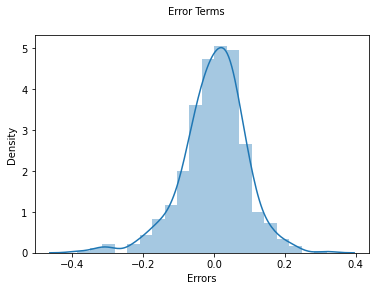

In [1573]:
# Plot the Graph of the error terms
fig = plt.figure()

sns.distplot((y_train - y_train_lm), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 10)  

plt.xlabel('Errors', fontsize = 10)

### Making predictions

#### scaling the test data

In [1574]:
day_test[num_vars] = scaler.transform(day_test[num_vars])

In [1575]:
y_test = day_test.pop('cnt')
X_test = day_test

In [1576]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test)

In [1577]:
X_test_sm = X_test_sm[X_train_lm.columns]

In [1578]:
# Making predictions
y_test_pred = lr_model.predict(X_test_sm)

In [1579]:
#test r2
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8105239966314984

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

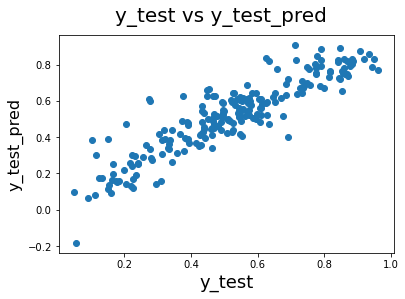

In [1580]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()

plt.scatter(y_test,y_test_pred)

# Plot heading 
fig.suptitle('y_test vs y_test_pred', fontsize=20)  

# X-label
plt.xlabel('y_test', fontsize=18)

# y-label
plt.ylabel('y_test_pred', fontsize=16) 

In [1581]:
# Test R Squared
test_r2= round(r2_score(y_test, y_test_pred),3)

print("Test R Squared : ", test_r2)

# Test Adjusted R Squared
test_n = X_test_sm.shape[0]
test_p = X_test_sm.shape[1]
test_adjusted_r2 = round(1-(1-test_r2)*(test_n-1)/(test_n-test_p-1),2)

print("Test Adjusted R Squared : ", test_adjusted_r2)

Test R Squared :  0.811
Test Adjusted R Squared :  0.8


In [1582]:
# Train R Squared
train_r2= round(r2_score(y_train, y_train_pred),3)

print("Train R Squared : ", train_r2)

# Train Adjusted R Squared
train_n = X_train_lm.shape[0]
train_p = X_train_lm.shape[1]
train_adjusted_r2 = round(1-(1-train_r2)*(train_n-1)/(train_n-train_p-1),2)

print("Train Adjusted R Squared : ", train_adjusted_r2)

Train R Squared :  0.844
Train Adjusted R Squared :  0.84


In [1583]:
# Percentage Difference 
print("Percentage Difference between Train and Test R squared : ", round((train_r2 - test_r2)/train_r2 *100 ,2),"%")
print("Percentage Difference between Train and Test Adjusted R Squared : ", round((train_adjusted_r2 - test_adjusted_r2)/ train_adjusted_r2*100,2), "%")

Percentage Difference between Train and Test R squared :  3.91 %
Percentage Difference between Train and Test Adjusted R Squared :  4.76 %


### Final Model Interpretation

#### Coefficient Values in our Model:

In [1584]:
lr_model.params

const                         0.258566
yr                            0.229864
holiday                      -0.093230
temp                          0.505807
hum                          -0.175871
windspeed                    -0.192691
season_summer                 0.099217
season_winter                 0.123739
mnth_Aug                      0.056778
mnth_Jan                     -0.039167
mnth_Oct                      0.038824
mnth_Sep                      0.125487
weathersit_Light Rain/Snow   -0.242034
weathersit_Mist              -0.053200
dtype: float64

#### Equation for best fitted line:

cnt= 0.258566 + (0.229864 x yr) - (holiday x 0.093230) + (temp x 0.505807) - (hum x 0.175871) - (windspeed x 0.192691) + 
(season_summer x 0.099217) + (season_winter x 0.123739) + (mnth_Aug x 0.056778) - (mnth_Jan x 0.039167) + 
(mnth_Oct x 0.038824) + (mnth_Sep x 0.125487) - (weathersit_Light Rain/Snow x 0.242034) - (weathersit_Mist/Cloudy x 0.053200)

### Coefficients Interpretation:

- yr: We can see a positive relation between cnt and year which indicates a good sales in 2018 & 2019.
- holiday :A coeff of -0.093230 tells us that if there is a holiday, the no. of users will decrease
- temp: we have positive coeff 0.505807 with temp
- hum: hum shows -0.175871 coeff
- windspeed: windspeed shows a negative coeff -0.192691. sales drops in windy weather.
- season : In our model where season_summer shows a positive 0.099217 coeff and winter shows a posiive coeff 0.123739. As we can see sales goes up in summer and winter.
- month : In the mon of Jan the sales show a negative difference whereas in Aug, Oct & sept showing a positive relationship with demand of the bikes.
- weather situation: The snow/rain weather nor mist weather is showing a positive coeff.

### Conclusion

- Company can continue with the stratergy used in 2019.
- They can offer a special discount on holidays for public to use bikes over other sevices.
- windspeed is a factor which can't be controlled by the comapny, so they can think another possible way to overcome this issue.
- They can offer coupons to encourage public to use bikes.
- Rainy weather is the most affecting weather for the comapny as people avoid going out on bikes in rainy season.